## 载入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，字体名称为win中中文字体对应的英文名
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [4]:
try:
    # 第一个参数比较灵活，可以是url,也可是文件路径，或者IO等。
    df_sonar = pd.read_csv("../../data/sonar.csv", header=0)
except Exception as e:
    print(e)
    df_sonar = pd.read_csv(target_url, header=None, prefix='V')
    df_sonar.to_csv("../../data/sonar.csv", index=False)

df_sonar.head()

V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9  ...     V51     V52     V53     V54     V55     V56     V57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078    R  
3  0.0040  0.0117    R  
4  0.0107  0.0094    R  

[5 rows x 61 columns]

## 计算相关系数矩阵，并绘制热力图

In [5]:
# DataFrame.corr()自动忽略了非数值型的值（即最后一列，target）
corr_matrix = df_sonar.corr()
corr_matrix

V0        V1        V2        V3        V4        V5        V6  \
V0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
V12  0.210722  0.249596  0.258767  0.215754  0.299086  0.411107  0.365391   
V13  0.256278  0.273170  0.291724  0.286708  0.359062  0.396233  0.409576   
V14  0.304878  0.307599  0.285663  0.278529  0.318059  0.367908  0.411692   
V15  0.239079  0.261844  0.237017  0.248245  0.328725  0.353783  0.363086   
V16  0.137845  0.152170  0.201093  0.223203  0.326477  0.293190  0.250024   
V17  0.041817  0.042870  0.120587  0.194992  0.299266  0.235778  0.208057   
V18  0.055227  0.040911  0.099303  0.189405  0.340543  0.226305  0.215495   
V19  0.156760  0.102428  0.103117  0.188317  0.285737  0.206841  0.196496   
V20  0.117663  0.075255  0.063990  0.142271  0.205088  0.174768  0.165827   
V21 -0.056973 -0.074157 -0.026815  0.036010  0.152897  0.123770  0.063773   
V22 -0.163426 -0.179365 -0.073400 -0.029749  0.073934  0.064081  0.009359   
V23 -0.218093 -0.196469 -0.085380 -0.102975 -0.000624  0.027026  0.011982   
V24 -0.295683 -0.295302 -0.214256 -0.206673 -0.067296 -0.043280 -0.057147   
V25 -0.342865 -0.365749 -0.291974 -0.291357 -0.125675 -0.100309 -0.126074   
V26 -0.341703 -0.337046 -0.263111 -0.294749 -0.169618 -0.129094 -0.179526   
V27 -0.224340 -0.234386 -0.256674 -0.256074 -0.214692 -0.118645 -0.116848   
V28 -0.199099 -0.228490 -0.290728 -0.300476 -0.283863 -0.156081 -0.129694   
V29 -0.077430 -0.115301 -0.197493 -0.236602 -0.273350 -0.151186 -0.068142   
V30 -0.048370 -0.055862 -0.106198 -0.190086 -0.214336 -0.054136 -0.096945   
V31 -0.030444 -0.049683 -0.109895 -0.169987 -0.173485 -0.051934 -0.115871   
V32 -0.031939 -0.108272 -0.170671 -0.164651 -0.200586 -0.144391 -0.127052   
V33  0.031319 -0.004247 -0.099409 -0.083965 -0.140559 -0.070337 -0.077662   
V34  0.098118  0.115824  0.017053  0.015200 -0.086529 -0.028815 -0.015531   
V35  0.080722  0.132611  0.053070  0.039282 -0.073481 -0.023621  0.002979   
V36  0.119565  0.169186  0.107530  0.063486 -0.064617 -0.064798 -0.001376   
V37  0.209873  0.217494  0.130276  0.089887 -0.008620 -0.048745  0.065900   
V38  0.208371  0.186828  0.110499  0.089346  0.063408  0.030599  0.080942   
V39  0.099993  0.098350  0.074137  0.045141  0.061616  0.081119  0.112673   
V40  0.127313  0.188226  0.189047  0.145241  0.098832  0.075797  0.041071   
V41  0.213592  0.261345  0.233442  0.144693  0.125181  0.048763 -0.028720   
V42  0.206057  0.186368  0.113920  0.050629  0.063706  0.034380 -0.025727   
V43  0.157949  0.133018  0.071946 -0.008407  0.031575  0.048870  0.061404   
V44  0.279968  0.285716  0.180734  0.087824  0.089202  0.085468  0.110813   
V45  0.319354  0.304247  0.173649  0.080012  0.081964  0.029524  0.076537   
V46  0.230343  0.255797  0.179528  0.046109  0.041419  0.016640  0.098925   
V47  0.203234  0.265279  0.234896  0.121065  0.084435  0.067196  0.155221   
V48  0.247560  0.313995  0.223074  0.133294  0.088128  0.080729  0.194720   
V49  0.269287  0.245868  0.081096  0.077925  0.066751  0.017300  0.166112   
V50  0.254450  0.320538  0.238110  0.174676  0.115936  0.171767  0.184152   
V51  0.

#### 绘制热力图

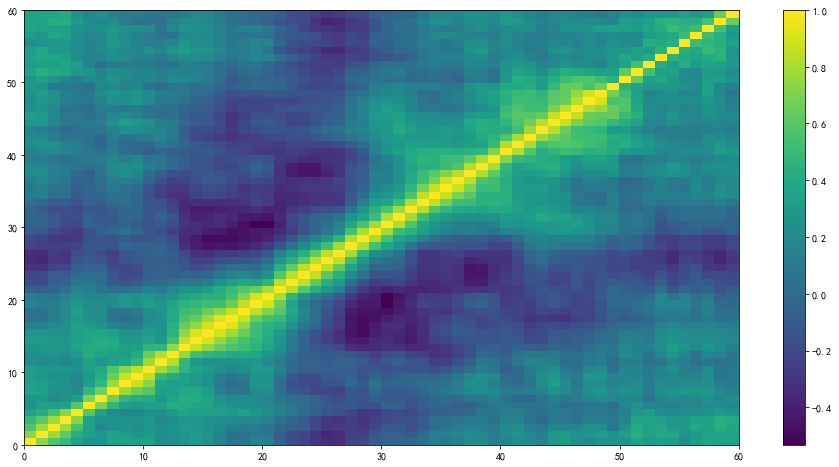

In [6]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
pic = ax.pcolor(corr_matrix)
fig.colorbar(pic, ax=ax)
plt.show()

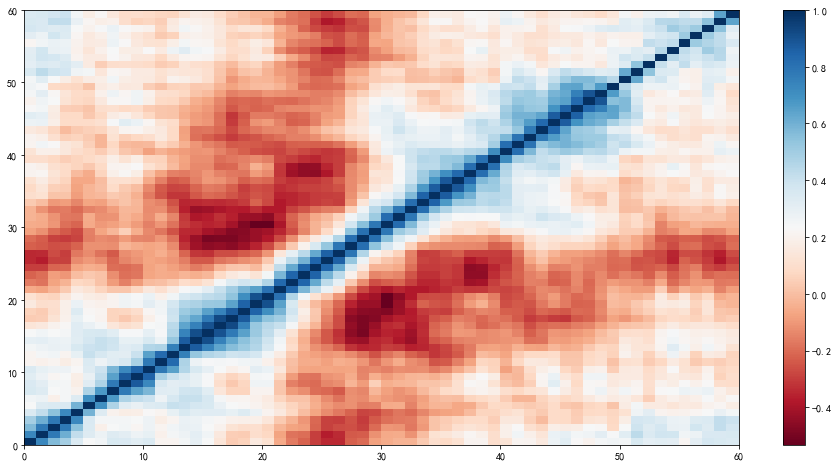

In [7]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
pic = ax.pcolormesh(corr_matrix, cmap='RdBu')  # 这个函数稍微快一点
fig.colorbar(pic, ax=ax)
plt.show()

=>对角线表示相关性最高，同时注意到序数相近的属性（对角线周围）的属性相关性也极高，这和数据是时序数据分段获取的有关  
1.属性之间如果完全相关，意味着数据可能有误，如：同样的数据录入两次  
2.多个属性间的相关性很高（corr > 0.7）,即多重共线性，往往会导致预测结果不稳定  

属性和标签之间的相关性则不同，如果属性和标签相关，则通常意味着两者之间具有可预测关系